In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-03-26 21:05:34--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-03-26 21:05:34--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.03s   

2025-03-26 21:05:35 (5.49 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [2]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

#### Cuantos datos tiene la tabla

In [4]:
import pandas as pd
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
data = pd.read_csv("framingham.csv")
print("La tabla tiene", data.shape[0], "filas y", data.shape[1], "columnas.")

print(f"La tabla tiene {data.shape[0]} filas y {data.shape[1]} columnas.")


--2025-03-26 21:08:23--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-03-26 21:08:23--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv.1’

framingham.csv.1    100%[===================>] 191.36K  --.-KB/s    in 0.03s   

2025-03-26 21:08:23 (5.76 MB/s) - ‘framingham.csv.1’ 

#### Medidas de tendencia central de las variables.

In [5]:
print(data.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

#### Grafico de Barras con el número de hombres y mujeres

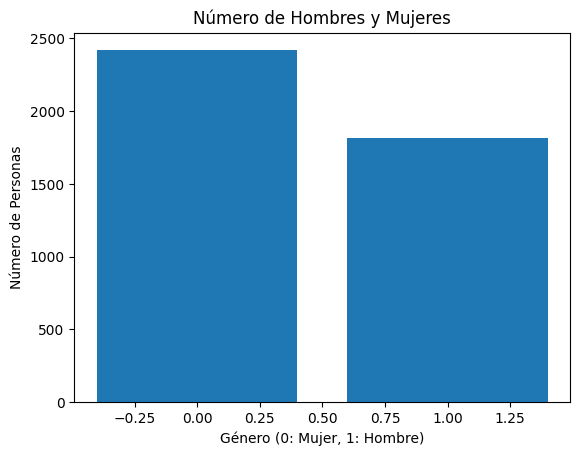

In [6]:
import matplotlib.pyplot as plt

gender_counts = data['male'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)

plt.xlabel('Género (0: Mujer, 1: Hombre)')
plt.ylabel('Número de Personas')
plt.title('Número de Hombres y Mujeres')

plt.show()

#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



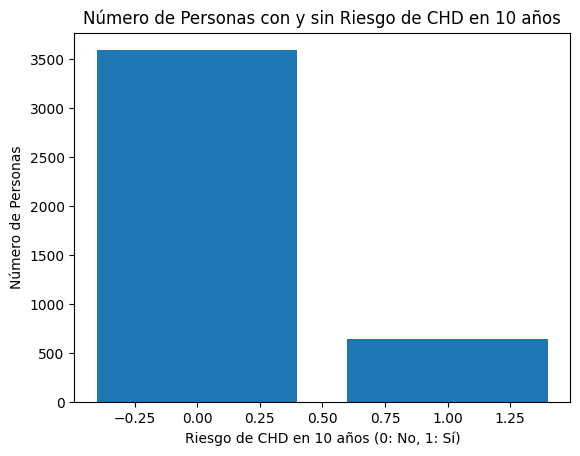

In [7]:
chd_counts = data['TenYearCHD'].value_counts()

plt.bar(chd_counts.index, chd_counts.values)

plt.xlabel('Riesgo de CHD en 10 años (0: No, 1: Sí)')
plt.ylabel('Número de Personas')
plt.title('Número de Personas con y sin Riesgo de CHD en 10 años')

plt.show()


#### Realice un grafico de densidad del BMI

<ipython-input-8-78621f0b0fcf>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['BMI'], shade=True)


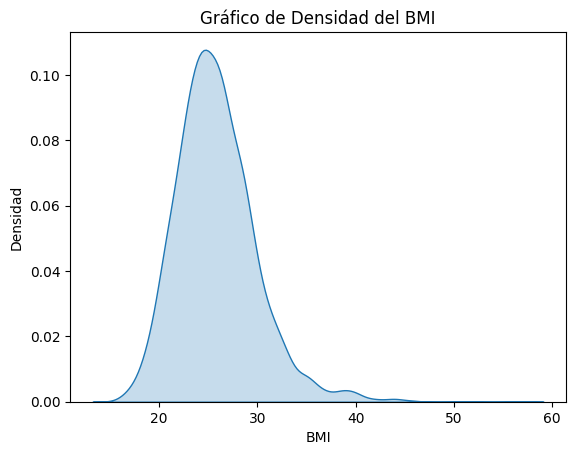

In [8]:
import seaborn as sns

sns.kdeplot(data['BMI'], shade=True)

plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad del BMI')

plt.show()

#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

<ipython-input-25-3a628441263c>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['male'] == 0]['BMI'], label='Mujeres', shade=True)
<ipython-input-25-3a628441263c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['male'] == 1]['BMI'], label='Hombres', shade=True)


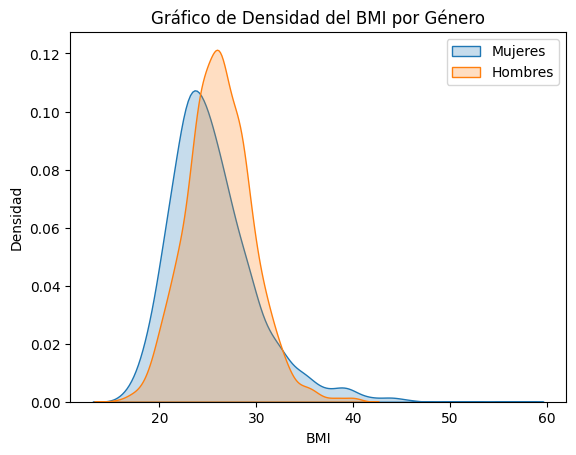

In [25]:
sns.kdeplot(data[data['male'] == 0]['BMI'], label='Mujeres', shade=True)
sns.kdeplot(data[data['male'] == 1]['BMI'], label='Hombres', shade=True)

plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad del BMI por Género')
plt.legend()
plt.show()

bmi_mujeres = data[data['male'] == 0]['BMI'].mean()
bmi_hombres = data[data['male'] == 1]['BMI'].mean()

In [10]:
print(f"BMI promedio para mujeres: {bmi_mujeres:.2f}")
print(f"BMI promedio para hombres: {bmi_hombres:.2f}")

if bmi_mujeres > bmi_hombres:
  print("Las mujeres tienen en promedio un mayor BMI.")
else:
  print("Los hombres tienen en promedio un mayor BMI.")

BMI promedio para mujeres: 25.51
BMI promedio para hombres: 26.19
Los hombres tienen en promedio un mayor BMI.


#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

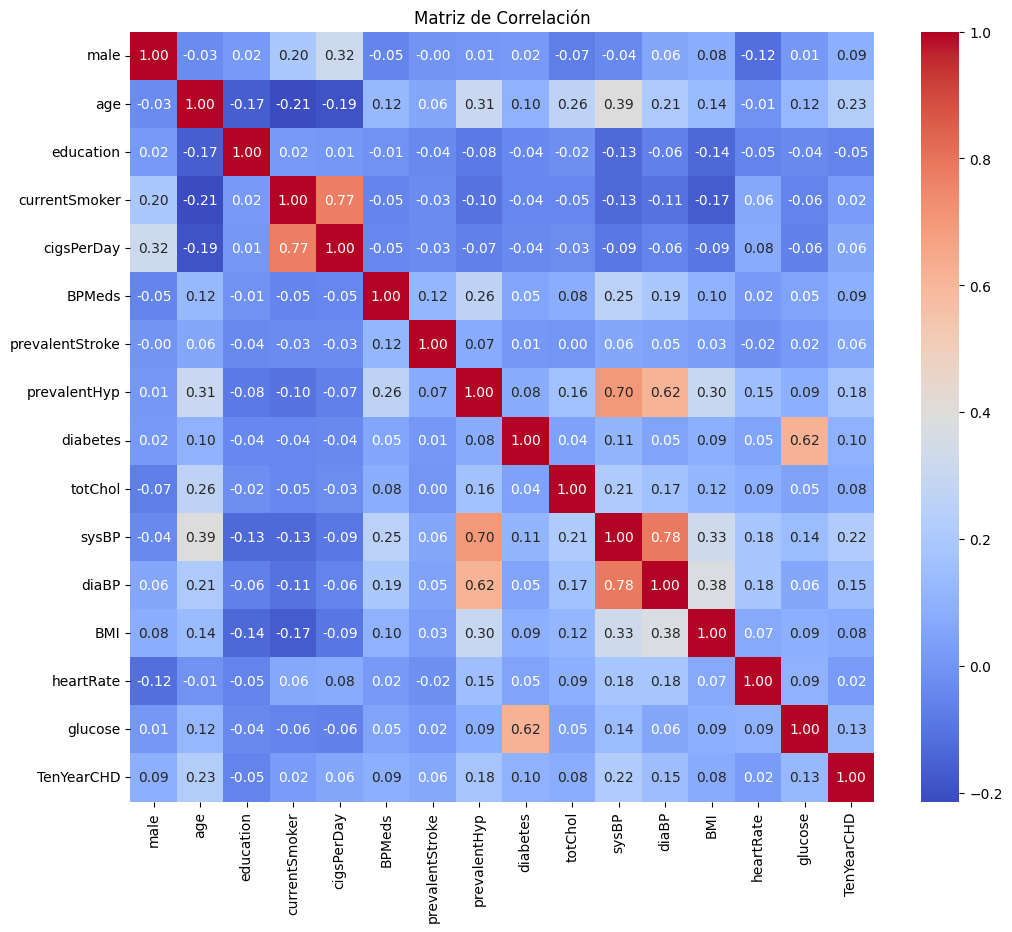

El par de variables más correlacionadas es sysBP y diaBP, con una correlación de 0.78.


In [26]:
import numpy as np # Importing the NumPy library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

correlation_matrix = correlation_matrix.abs()
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))  # Using np.triu, np.ones, and np.astype from the imported NumPy library
max_value = np.nanmax(upper_triangle)
row_max, col_max = np.where(upper_triangle == max_value)

if row_max.size > 0 and col_max.size > 0:
  variable1 = correlation_matrix.index[row_max[0]]
  variable2 = correlation_matrix.columns[col_max[0]]
  print(f"El par de variables más correlacionadas es {variable1} y {variable2}, con una correlación de {max_value:.2f}.")
else:
  print("No se encontraron pares de variables correlacionadas.")

¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

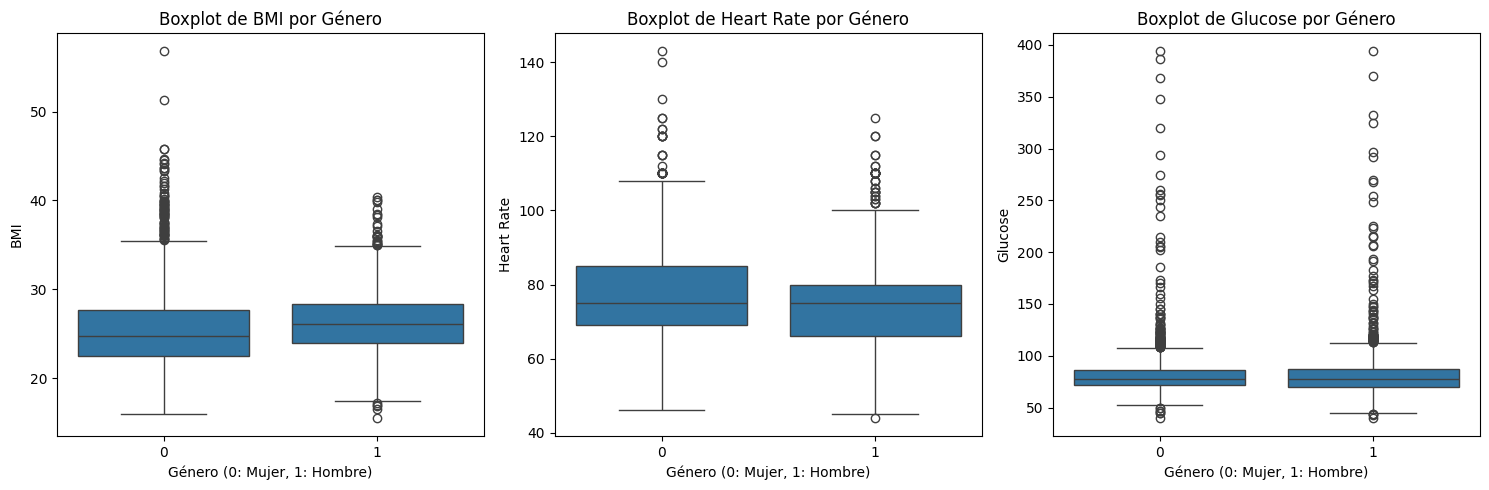

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='male', y='BMI', data=data, ax=axes[0])
axes[0].set_xlabel('Género (0: Mujer, 1: Hombre)')
axes[0].set_ylabel('BMI')
axes[0].set_title('Boxplot de BMI por Género')

sns.boxplot(x='male', y='heartRate', data=data, ax=axes[1])
axes[1].set_xlabel('Género (0: Mujer, 1: Hombre)')
axes[1].set_ylabel('Heart Rate')
axes[1].set_title('Boxplot de Heart Rate por Género')

sns.boxplot(x='male', y='glucose', data=data, ax=axes[2])
axes[2].set_xlabel('Género (0: Mujer, 1: Hombre)')
axes[2].set_ylabel('Glucose')
axes[2].set_title('Boxplot de Glucose por Género')

plt.tight_layout()
plt.show()

### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [27]:
null_counts = data.isnull().sum()

null_counts

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [20]:
data_cleaned = data.dropna()
print(f"Después de eliminar los datos faltantes, quedan {data_cleaned.shape[0]} filas.")

Después de eliminar los datos faltantes, quedan 3656 filas.


#### Seleccione sus variables X y su variable y

In [21]:
X = data_cleaned[['age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

In [22]:
y = data_cleaned['TenYearCHD']

#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(f"Tamaño del dataset de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del dataset de prueba: {X_test.shape[0]} filas")


Tamaño del dataset de entrenamiento: 2559 filas
Tamaño del dataset de prueba: 1097 filas


#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [28]:
coefficients = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_[0]})
print(coefficients)

max_effect_variable = coefficients.loc[coefficients['Coeficiente'].abs().idxmax(), 'Variable']
max_effect_coefficient = coefficients.loc[coefficients['Coeficiente'].abs().idxmax(), 'Coeficiente']

print(f"\nLa variable con mayor efecto sobre el desarrollo de una enfermedad cardiaca es: {max_effect_variable}")
print(f"Su coeficiente es: {max_effect_coefficient:.4f}")

        Variable  Coeficiente
0            age     0.055465
1  currentSmoker     0.356470
2        totChol    -0.007073
3          sysBP     0.017627
4          diaBP    -0.015263
5            BMI    -0.029040
6      heartRate    -0.018959
7        glucose     0.008518

La variable con mayor efecto sobre el desarrollo de una enfermedad cardiaca es: currentSmoker
Su coeficiente es: 0.3565


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precisión:", precision)

f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Matriz de confusión:
[[912   6]
 [172   7]]
Accuracy: 0.837739288969918
Recall: 0.03910614525139665
Precisión: 0.5384615384615384
F1-score: 0.07291666666666667


#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

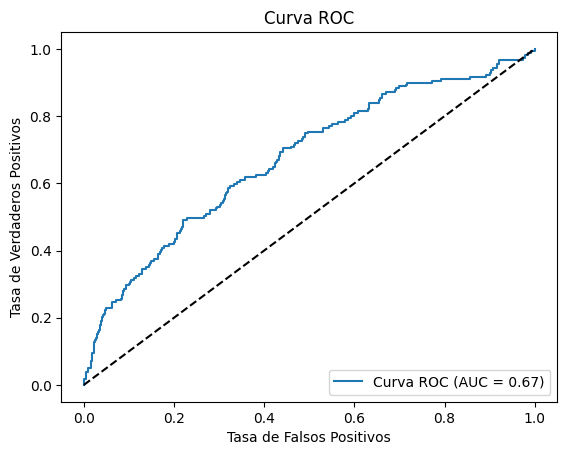

El valor del AUC es: 0.67


In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

print(f"El valor del AUC es: {auc:.2f}")

## Corrección desbalance de clases
1. Busque la funcion train_test_split en su codigo y agregue la opcion stratify  = y . Por que esto ayudaría con el desblance?
2. usando from imblearn.over_sampling import SMOTE mejore el performance
 3. Saque todo el modelo y la matriz y la grafica de ROC AUC

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 427.9555555555555, 'Predicted label')

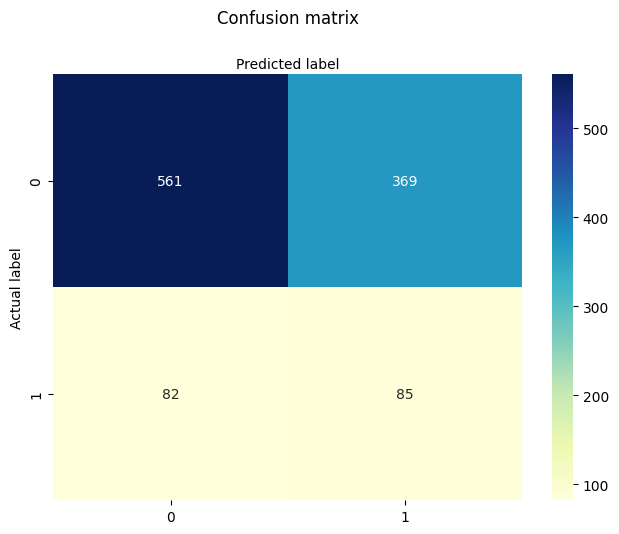

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,stratify=y, random_state=42)

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

logreg_smote = LogisticRegression()
logreg_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg_smote.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred_smote)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

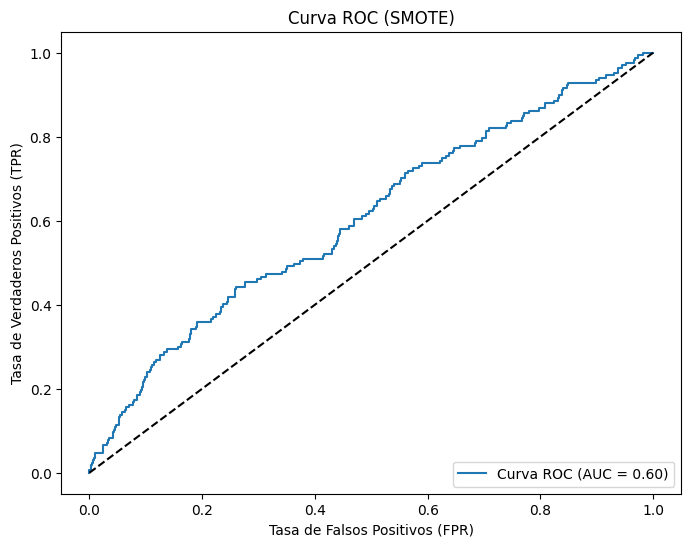


AUC (SMOTE): 0.6046


In [40]:
y_pred_proba_smote = logreg_smote.predict_proba(X_test)[:, 1]
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_proba_smote)
auc_smote = roc_auc_score(y_test, y_pred_proba_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label='Curva ROC (AUC = %0.2f)' % auc_smote)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (SMOTE)')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC (SMOTE): {auc_smote:.4f}")

## Pinter el resultado con SMOTE y sin SMOTE

In [41]:
print("Resultados sin SMOTE:")
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1)
print("AUC:", auc)

print("\nResultados con SMOTE:")
accuracy_smote = accuracy_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)

print("Accuracy:", accuracy_smote)
print("Recall:", recall_smote)
print("Precision:", precision_smote)
print("F1-score:", f1_smote)
print("AUC:", auc_smote)


Resultados sin SMOTE:
Accuracy: 0.6153144940747494
Recall: 0.5449101796407185
Precision: 0.20823798627002288
F1-score: 0.30132450331125826
AUC: 0.6107269332303136

Resultados con SMOTE:
Accuracy: 0.5888787602552416
Recall: 0.5089820359281437
Precision: 0.18722466960352424
F1-score: 0.27375201288244766
AUC: 0.6046230120404352


### Como mejora su modelo con StandardScaler()

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
# prompt: Como mejora su modelo con StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with scaled data
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)

# Make predictions with scaled data
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Evaluate the model with scaled data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)
y_pred_proba_scaled = model_scaled.predict_proba(X_test_scaled)[:, 1]
auc_scaled = roc_auc_score(y_test, y_pred_proba_scaled)


print("\nResultados con StandardScaler:")
print("Accuracy:", accuracy_scaled)
print("Recall:", recall_scaled)
print("Precision:", precision_scaled)
print("F1-score:", f1_scaled)
print("AUC:", auc_scaled)


In [43]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)
y_pred_proba_scaled = model_scaled.predict_proba(X_test_scaled)[:, 1]
auc_scaled = roc_auc_score(y_test, y_pred_proba_scaled)


print("\nResultados con StandardScaler:")
print("Accuracy:", accuracy_scaled)
print("Recall:", recall_scaled)
print("Precision:", precision_scaled)
print("F1-score:", f1_scaled)
print("AUC:", auc_scaled)



Resultados con StandardScaler:
Accuracy: 0.8514129443938013
Recall: 0.0658682634730539
Precision: 0.6111111111111112
F1-score: 0.11891891891891893
AUC: 0.7331916811538214


### Pinte todas las graficas original SMOTE y SMOTE Scaler

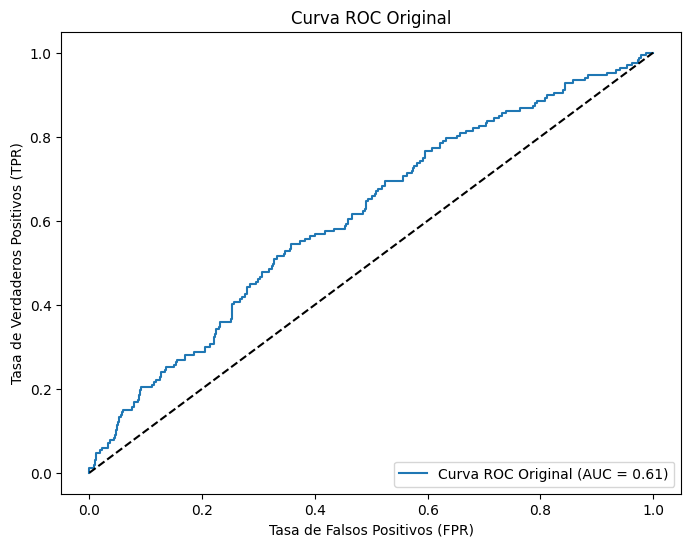

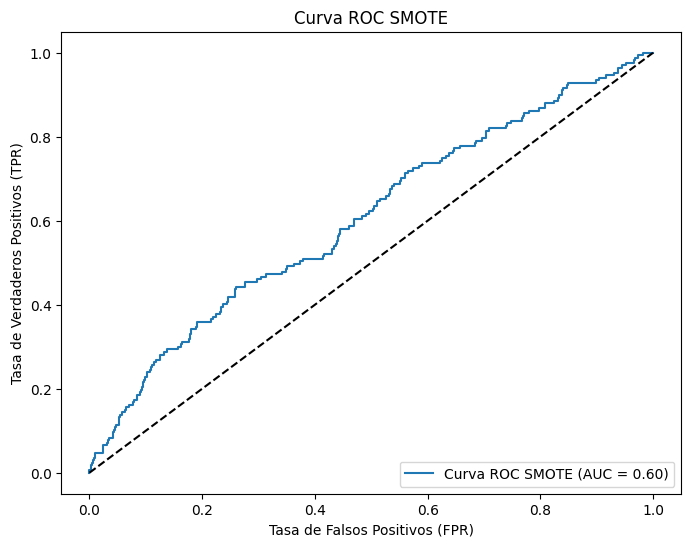

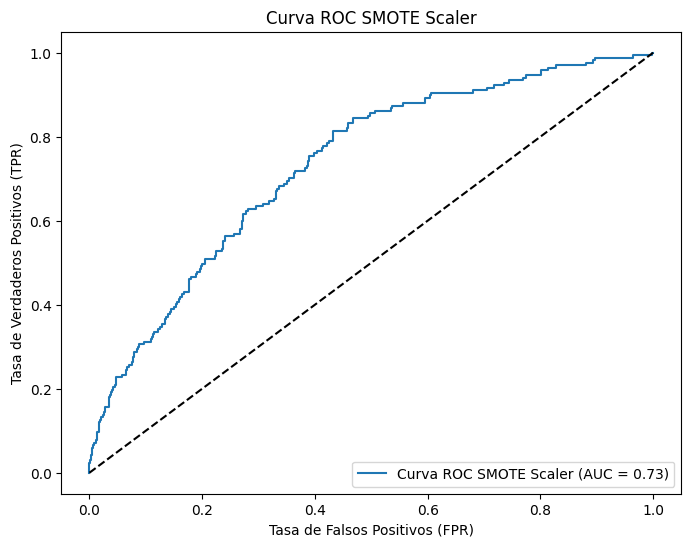

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC Original (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Original')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label='Curva ROC SMOTE (AUC = %0.2f)' % auc_smote)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC SMOTE')
plt.legend(loc="lower right")
plt.show()

fpr_scaled, tpr_scaled, thresholds_scaled = roc_curve(y_test, y_pred_proba_scaled)
auc_scaled = roc_auc_score(y_test, y_pred_proba_scaled)

plt.figure(figsize=(8, 6))
plt.plot(fpr_scaled, tpr_scaled, label='Curva ROC SMOTE Scaler (AUC = %0.2f)' % auc_scaled)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC SMOTE Scaler')
plt.legend(loc="lower right")
plt.show()
